# Pandas Data Analysis Practice

In [2]:
import pandas as pd

In this assignment, we're going to analyze an operate on data from a CSV file. Let's begin by downloading the CSV file.

In [3]:
from urllib.request import urlretrieve

urlretrieve('https://hub.jovian.ml/wp-content/uploads/2020/09/countries.csv', 
            'countries.csv')

('countries.csv', <http.client.HTTPMessage at 0xbf89be0>)

Let's load the data from the CSV file into a Pandas data frame.

In [4]:
countries_df = pd.read_csv('../data/countries.csv')

In [5]:
countries_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987
1,Albania,Europe,2877800.0,78.57,2.89,11803.431
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839
3,Andorra,Europe,77265.0,83.73,NaN,NaN
4,Angola,Africa,32866268.0,61.15,NaN,5819.495
...,...,...,...,...,...,...
205,Vietnam,Asia,97338583.0,75.40,2.60,6171.884
206,Western Sahara,Africa,597330.0,70.26,NaN,NaN
207,Yemen,Asia,29825968.0,66.12,0.70,1479.147
208,Zambia,Africa,18383956.0,63.89,2.00,3689.251


**Q1: How many countries does the dataframe contain?**

Hint: Use the `.shape` method.

In [6]:
num_countries = countries_df.shape

In [7]:
print(f'There are {num_countries[0]} countries in the dataset')

There are 210 countries in the dataset


**Q2: Retrieve a list of continents from the dataframe?**

*Hint: Use the `.unique` method of a series.*

In [8]:
continents = countries_df.location.unique()

In [9]:
continents

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Faeroe Islands', 'Falkland Isla

**Q3: What is the total population of all the countries listed in this dataset?**

In [10]:
total_population = countries_df.population.sum()

In [11]:
print(f'The total population is {total_population}.')

The total population is 7757980095.0.


**Q: (Optional) What is the overall life expectancy across in the world?**

*Hint: You'll need to take a weighted average of life expectancy using populations as weights.*

In [12]:
# Check null values
countries_df[countries_df.life_expectancy.isna()]

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
81,Guernsey,Europe,67052.0,NaN,NaN,NaN
100,Jersey,Europe,101073.0,NaN,NaN,NaN
104,Kosovo,Europe,1932774.0,NaN,NaN,9795.834


In [13]:
world_life_expectancy = countries_df.life_expectancy.multiply(
    countries_df.population).sum() / countries_df.population.sum()

In [14]:
print(world_life_expectancy)
print(countries_df.life_expectancy.mean())

72.72165193409664
73.52985507246377


In [15]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    210 non-null    object 
 1   continent                   210 non-null    object 
 2   population                  210 non-null    float64
 3   life_expectancy             207 non-null    float64
 4   hospital_beds_per_thousand  164 non-null    float64
 5   gdp_per_capita              183 non-null    float64
dtypes: float64(4), object(2)
memory usage: 8.3+ KB


**Q4: Create a dataframe containing 10 countries with the highest population.**

*Hint: Chain the `sort_values` and `head` methods.*

In [16]:
most_populous_df = countries_df[['location', 'continent', 'population']].sort_values(by=['population', 'continent'], ascending=False).head(10)

<AxesSubplot:title={'center':"World's Most Populous Nations"}, xlabel='location'>

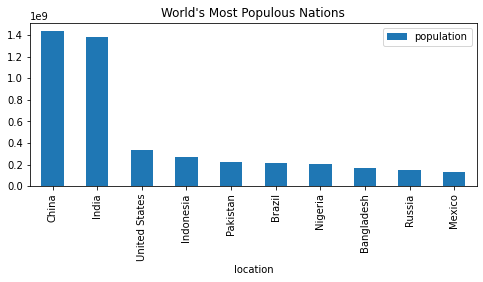

In [30]:
most_populous_df.plot(x='location', y='population', kind='bar', legend=True, title="World's Most Populous Nations", figsize=(8,3))

**Q5: Add a new column in `countries_df` to record the overall GDP per country (product of population & per capita GDP).**



In [ ]:
countries_df['gdp'] = countries_df.population * countries_df.gdp_per_capita

In [ ]:
countries_df.gdp

0      7.022622e+10
1      3.396791e+10
2      6.101364e+11
3               NaN
4      1.912651e+11
           ...     
205    6.007624e+11
206             NaN
207    4.411699e+10
208    6.782303e+10
209    2.823622e+10
Name: gdp, Length: 210, dtype: float64

**Q: (Optional) Create a dataframe containing 10 countries with the lowest GDP per capita, among the counties with population greater than 100 million.**

In [ ]:
lowest_per_capita_df = countries_df[['location','population', 'gdp_per_capita']][countries_df.population > 1e8].sort_values(by='gdp_per_capita').head(10)

In [ ]:
print(lowest_per_capita_df)

        location    population  gdp_per_capita
63      Ethiopia  1.149636e+08        1729.927
15    Bangladesh  1.646894e+08        3523.984
145     Pakistan  2.208923e+08        5034.708
141      Nigeria  2.061396e+08        5338.454
90         India  1.380004e+09        6426.674
151  Philippines  1.095811e+08        7599.188
58         Egypt  1.023344e+08       10550.206
91     Indonesia  2.735236e+08       11188.744
27        Brazil  2.125594e+08       14103.452
41         China  1.439324e+09       15308.712


**Q6: Create a data frame that counts the number countries in each continent?**

*Hint: Use `groupby`, select the `location` column and aggregate using `count`.*

In [ ]:
country_counts_df = countries_df[['continent','location']].groupby(by='continent').count()

In [ ]:
country_counts_df

,location
continent,
Africa,55
Asia,47
Europe,51
North America,36
Oceania,8
South America,13


**Q7: Create a data frame showing the total population of each continent.**

*Hint: Use `groupby`, select the population column and aggregate using `sum`.*

In [ ]:
continent_populations_df = countries_df[['continent', 'population']].groupby(by='continent').sum()

In [ ]:
continent_populations_df

,population
continent,
Asia,4.607388e+09
Africa,1.339424e+09
Europe,7.485062e+08
North America,5.912425e+08
South America,4.304611e+08
Oceania,4.095832e+07


Let's download another CSV file containing overall Covid-19 stats for various countires, and read the data into another Pandas data frame.

In [ ]:
urlretrieve('https://hub.jovian.ml/wp-content/uploads/2020/09/covid-countries-data.csv', 
            'covid-countries-data.csv')

('covid-countries-data.csv', <http.client.HTTPMessage at 0x51f6220>)

In [ ]:
covid_data_df = pd.read_csv('covid-countries-data.csv')

In [ ]:
covid_data_df

,location,total_cases,total_deaths,total_tests
0,Afghanistan,38243.0,1409.0,NaN
1,Albania,9728.0,296.0,NaN
2,Algeria,45158.0,1525.0,NaN
3,Andorra,1199.0,53.0,NaN
4,Angola,2729.0,109.0,NaN
...,...,...,...,...
207,Western Sahara,766.0,1.0,NaN
208,World,26059065.0,863535.0,NaN
209,Yemen,1976.0,571.0,NaN
210,Zambia,12415.0,292.0,NaN


**Q8: Count the number of countries for which the `total_tests` data is missing.**

*Hint: Use the `.isna` method.*

In [ ]:
total_tests_missing = covid_data_df.total_tests.isna().count()
# print(total_tests_missing)

In [ ]:
print(f"The data for total tests is missing for {total_tests_missing} countries.")

The data for total tests is missing for 212 countries.


Let's merge the two data frames, and compute some more metrics.

**Q9: Merge `countries_df` with `covid_data_df` on the `location` column.**

*Hint: Use the `.merge` method on `countries_df`.

In [ ]:
combined_df = countries_df.merge(covid_data_df, on='location')

In [ ]:
combined_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,gdp,total_cases,total_deaths,total_tests
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987,7.022622e+10,38243.0,1409.0,NaN
1,Albania,Europe,2877800.0,78.57,2.89,11803.431,3.396791e+10,9728.0,296.0,NaN
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839,6.101364e+11,45158.0,1525.0,NaN
3,Andorra,Europe,77265.0,83.73,NaN,NaN,NaN,1199.0,53.0,NaN
4,Angola,Africa,32866268.0,61.15,NaN,5819.495,1.912651e+11,2729.0,109.0,NaN
...,...,...,...,...,...,...,...,...,...,...
205,Vietnam,Asia,97338583.0,75.40,2.60,6171.884,6.007624e+11,1046.0,35.0,261004.0
206,Western Sahara,Africa,597330.0,70.26,NaN,NaN,NaN,766.0,1.0,NaN
207,Yemen,Asia,29825968.0,66.12,0.70,1479.147,4.411699e+10,1976.0,571.0,NaN
208,Zambia,Africa,18383956.0,63.89,2.00,3689.251,6.782303e+10,12415.0,292.0,NaN


**Q10: Add columns `tests_per_million`, `cases_per_million` and `deaths_per_million` into `combined_df`.**

In [ ]:
combined_df['tests_per_million'] = combined_df['total_tests'] * 1e6 / combined_df['population']

In [ ]:
combined_df['cases_per_million'] = combined_df['total_cases'] * 1e6 / combined_df['population']

In [ ]:
combined_df['deaths_per_million'] = combined_df['total_deaths'] * 1e6 / combined_df['population']

In [ ]:
combined_df[['location','tests_per_million', 'cases_per_million', 'deaths_per_million']][~combined_df.cases_per_million.isna()].sort_values(by='cases_per_million', ascending=False).head(10)

**Q11: Create a dataframe with 10 countires that have highest number of tests per million people.**

In [ ]:
highest_tests_df = combined_df[['location','tests_per_million']].sort_values(by='tests_per_million', ascending=False).head(10)

In [ ]:
highest_tests_df

,location,tests_per_million
197,United Arab Emirates,725696.635121
14,Bahrain,657527.137965
115,Luxembourg,616349.508607
122,Malta,427004.183096
53,Denmark,422621.755488
96,Israel,271962.665303
89,Iceland,260304.761905
157,Russia,254750.159763
199,United States,253467.507769
10,Australia,245326.517406


**Q12: Create a dataframe with 10 countires that have highest number of positive cases per million people.**

In [ ]:
highest_cases_df = combined_df[['location', 'cases_per_million']].sort_values(
    by='cases_per_million', ascending=False).head(10)


In [ ]:
highest_cases_df

,location,cases_per_million
155,Qatar,41375.743650
14,Bahrain,30818.361490
147,Panama,21805.112117
40,Chile,21695.671982
162,San Marino,21657.139490
9,Aruba,20708.839893
105,Kuwait,20249.789079
150,Peru,20121.318048
27,Brazil,18808.224105
199,United States,18472.377957


**Q13: Create a dataframe with 10 countires that have highest number of deaths cases per million people?**

In [ ]:
highest_deaths_df = combined_df[['location', 'deaths_per_million']].sort_values(
    by='deaths_per_million', ascending=False).head(10)


In [ ]:
highest_deaths_df

,location,deaths_per_million
162,San Marino,1237.550828
150,Peru,887.393445
18,Belgium,854.040375
3,Andorra,685.950948
177,Spain,624.406705
198,United Kingdom,611.525168
40,Chile,593.423100
97,Italy,587.097697
27,Brazil,582.331314
182,Sweden,576.279276


**(Optional) Q: Count number of countries that feature in both the lists of "highest number of tests per million" and "highest number of cases per million".**

In [ ]:
common_highest_df = highest_tests_df.location.reset_index().merge(highest_cases_df.location.reset_index()).shape[0]


In [ ]:
common_highest_df

2

**(Optional) Q: Count number of countries that feature in both the lists "20 countries with lowest GDP per capita" and "20 countries with the lowest number of hospital beds per thousand population". Only consider countries with a population higher than 10 million while creating the list.**

In [ ]:
lowest_per_capita_20_df = combined_df[['location', 'gdp_per_capita']][combined_df.population > 1e7].sort_values(by='gdp_per_capita').head(20)

In [ ]:
lowest_beds_20_df = combined_df[['location', 'hospital_beds_per_thousand']
                                ][combined_df.population > 1e7].sort_values(by='hospital_beds_per_thousand').head(20)


In [ ]:
common_lowest_df = lowest_per_capita_20_df.location.reset_index().merge(lowest_beds_20_df.reset_index()).shape[0]

In [ ]:
common_lowest_df

3